In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

#### 1. Определяем форму датафрейма

In [43]:
db = pd.read_csv("train.csv", sep=",")
db.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [44]:
''' Определение формы датафрейма. '''
def df_info(input_dataframe):
    print(input_dataframe.info())
    return print("Форма: {}\n\nСтолбцы: {}\n\nИндексы: {}\n".format(input_dataframe.shape, 
                                                                      input_dataframe.columns, input_dataframe.index))


In [55]:
df_info(db)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB
None
Форма: (10000, 20)

Столбцы: Index(['Id', 'Distr

In [54]:
db.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [62]:
db_tmp = db.copy()


#### 2. Вводим фиктивные переменные

In [63]:
b = [ 'Ecology_2', 'Ecology_3', 'Shops_2']
for i in b:
    print(i)
    print(    db[i].value_counts()) 

Ecology_2
B    9903
A      97
Name: Ecology_2, dtype: int64
Ecology_3
B    9725
A     275
Name: Ecology_3, dtype: int64
Shops_2
B    9175
A     825
Name: Shops_2, dtype: int64


In [363]:
AB = ("A","B")
def make_dummy(df, AB, col):
    for i in col:
        maper = {
            AB[0]: 0,
            AB[1]: 1,
                }
        df[i] = df[i].map(maper)
        return df

In [65]:
b = ['Ecology_2', 'Ecology_3', 'Shops_2']
AB = ("A","B")
make_dummy(db_tmp, AB, b)
db_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int64
Ecology_3        10000 non-null int64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int64
Price            10000 non-null float64
dtypes: float64(8), int64(12)
memory usage: 1.5 MB


#### 3. Убираем выбросы

       LifeSquare
4328  7480.592129
4690   410.639749
6977   638.163193
8437   461.463614


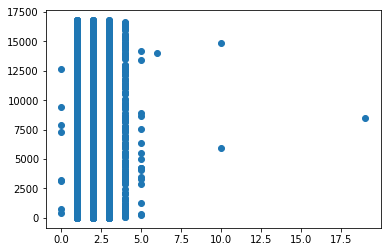

In [98]:
plt.scatter(db_tmp["Rooms"],db_tmp["Id"])
print(db.loc[db["LifeSquare"] > 400,["LifeSquare"]])

In [97]:
db_tmp.loc[(db_tmp["Rooms"] == 19)]



,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,1,1,264,0,NaN,0,1,1,78364.616704


In [113]:
print(db_tmp.loc [ ( (db_tmp['Rooms'] <= 62) | (db_tmp['Rooms'] >= 58) ) , 'Rooms' ].mean())
room42m = np.round(
    db_tmp.loc [ ( (db_tmp['Rooms'] <= 44) | (db_tmp['Rooms'] >= 40) ) , 'Rooms' ].mean()
)
print(room42m)

db_tmp.loc[(db_tmp["Rooms"] > 5), "Rooms" ] = room42m



2.0


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


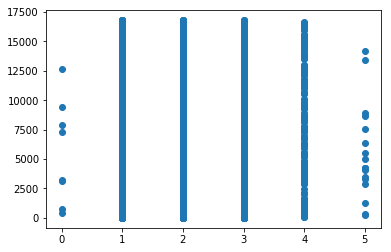

In [114]:
plt.scatter(db_tmp["Rooms"],db_tmp["Id"])
db_tmp.loc[(db_tmp["Rooms"] > 5)]

In [111]:
print(db_tmp.loc [ ( (db_tmp['Rooms'] <= 62) | (db_tmp['Rooms'] >= 58) ) , 'Rooms' ].mean())

1.8888


In [139]:
def print_scatter(df, col):
    for i in col:
        print("Разброс параметра", i)
        plt.scatter(df[i],df["Id"])
        plt.show()


Разброс параметра Square


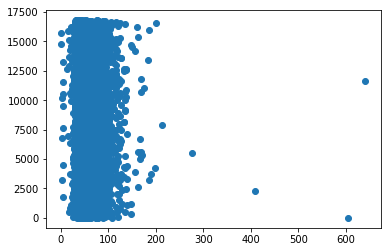

Разброс параметра LifeSquare


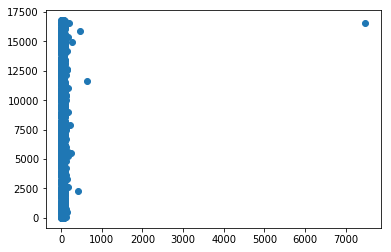

Разброс параметра KitchenSquare


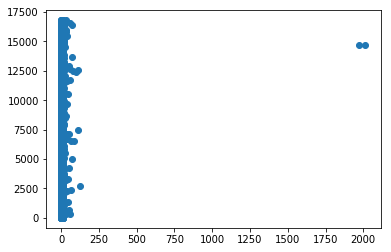

Разброс параметра Floor


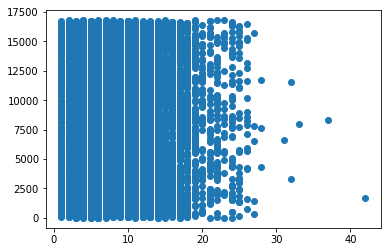

Разброс параметра HouseFloor


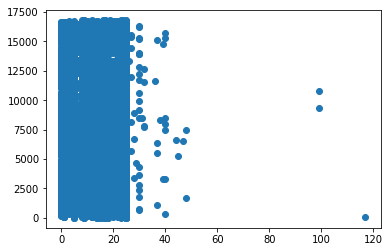

Разброс параметра HouseYear


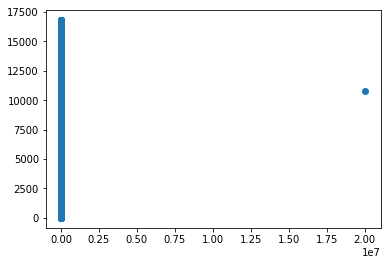

Разброс параметра Ecology_1


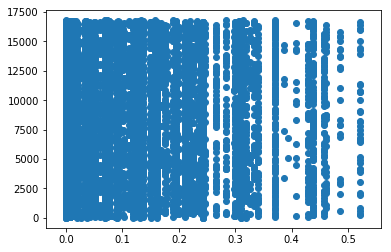

Разброс параметра Ecology_2


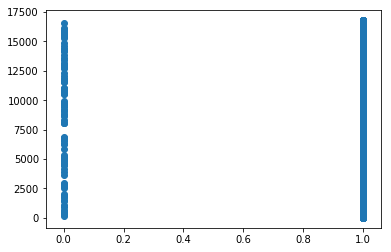

Разброс параметра Ecology_3


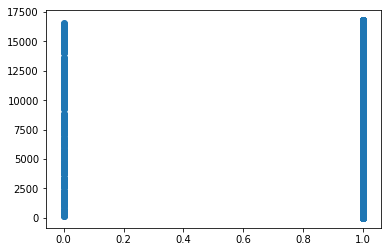

Разброс параметра Social_1


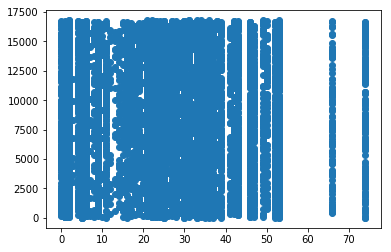

Разброс параметра Social_2


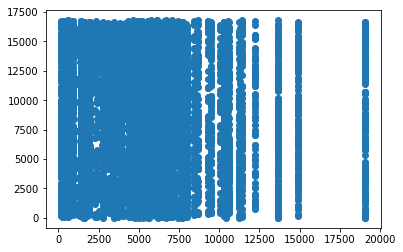

Разброс параметра Social_3


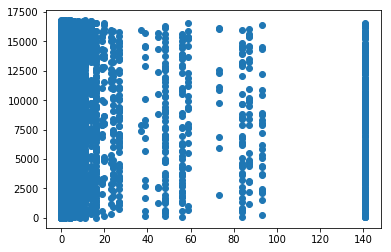

Разброс параметра Healthcare_1


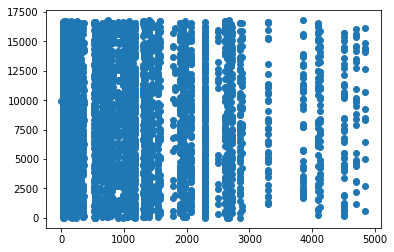

Разброс параметра Helthcare_2


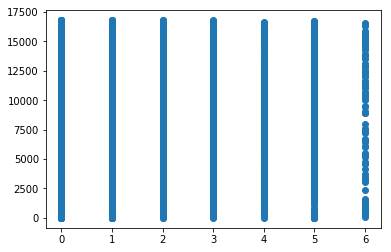

Разброс параметра Shops_1


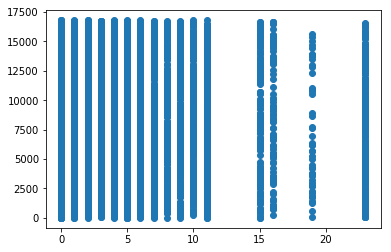

Разброс параметра Shops_2


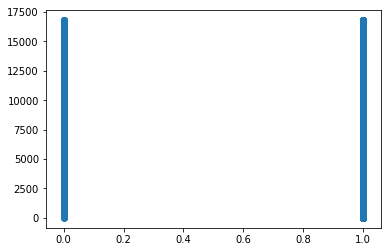

In [140]:
col = ('Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2')
print_scatter(db_tmp, col)

In [220]:
db_tmp.loc[(db_tmp["Square"] > 250)]





,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,275.645284,56.0,26.0,12,37.0,2011,0.161976,1,0,31,7010,5,4508.0,3,7,1,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,1,1,25,5648,1,30.0,2,4,1,187717.242538
4690,2307,102,1.0,409.425181,56.0,10.0,4,4.0,2016,0.238617,1,1,26,3889,6,705.0,3,6,1,90470.430830
6977,11602,30,2.0,641.065193,56.0,10.0,20,19.0,2019,0.000078,1,1,22,6398,141,1046.0,3,23,1,133529.681562


In [192]:
db_tmp.loc[(db_tmp["LifeSquare"] > 1000)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,1,1,2,469,0,NaN,0,0,1,217357.492366


In [191]:
db_tmp.loc[(db_tmp["KitchenSquare"] > 200)]



,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [146]:
db_tmp.loc[(db_tmp["HouseFloor"] > 60)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,1,1,16,3433,4,2643.0,4,5,1,296127.115515
8599,9300,74,2.0,71.747869,74.579809,9.0,5,99.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1,243329.912579
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,1,1,22,6398,141,1046.0,3,23,1,207248.370520


In [152]:
db_tmp.loc[(db_tmp["HouseYear"] > 2020)]
db_tmp.loc[(db_tmp["HouseYear"] > 2020), "HouseYear" ] = 2011

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [158]:
def clean_data_3std(df, columns):
    for i in columns:
        mean = np.round(df[i].mean())
        std3 = 3 * np.round(df[i].std())
        conf_interval = mean + std3
        print("Среднее по ", i , mean)
        print("+3 сигма ",mean + std3)
        
        #df.loc[ ((df[i] < (mean - std3)) | df[i].isnull() | ( df[i] > (mean + std3) )), i ] = mean
    

    

In [159]:
col2 = ('Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor')
clean_data_3std(db_tmp, col2)

Среднее по  Square 56.0
+3 сигма  119.0
Среднее по  LifeSquare 37.0
+3 сигма  295.0
Среднее по  KitchenSquare 6.0
+3 сигма  93.0
Среднее по  HouseFloor 13.0
+3 сигма  34.0


In [175]:
print(db_tmp.loc[(db_tmp["HouseYear"] == 1977), "HouseFloor"].mode() )
HouseFloor1977_mode = db_tmp.loc[(db_tmp["HouseYear"] == 1977), "HouseFloor"].mode()
db_tmp.loc[(db_tmp["HouseFloor"] > 60), "HouseFloor"] = HouseFloor1977_mode

0    17.0
dtype: float64


In [204]:
print(db_tmp.loc[(np.round(db_tmp["LifeSquare"]) == 46), "KitchenSquare"].mode() )
print(db_tmp.loc[(np.round(db_tmp["LifeSquare"]) == 46), "KitchenSquare"].mean() )
# HouseFloor1977_mode = db_tmp.loc[(db_tmp["HouseYear"] == 1977), "HouseFloor"].mode()
db_tmp.loc[(db_tmp["KitchenSquare"] > 200), "KitchenSquare"] = 10

0    10.0
dtype: float64
7.905027932960894


In [225]:
print(db_tmp.loc[(np.round(db_tmp["Square"]) == 82), "LifeSquare"].mode() )
db_tmp.loc[(db_tmp["LifeSquare"] > 200), "LifeSquare"] = 56
print(db_tmp.loc[(np.round(db_tmp["Square"]) == 82), "LifeSquare"].mean() )

0     40.316798
1     41.571740
2     42.975468
3     43.688798
4     44.486986
5     44.767324
6     45.233108
7     45.236328
8     45.622162
9     45.699132
10    46.351682
11    46.374340
12    47.009776
13    47.481741
14    47.840218
15    48.218451
16    48.269469
17    48.328522
18    48.655394
19    48.663117
20    48.749572
21    48.938555
22    49.338067
23    49.548937
24    51.205033
25    51.415229
26    51.510559
27    51.672473
28    51.777317
29    52.187231
30    54.391160
31    54.767647
32    55.245066
33    55.637233
34    56.000000
35    56.867287
36    56.918653
37    57.290860
38    57.361242
39    57.850049
40    58.670255
41    76.965107
42    77.649794
43    78.465957
44    78.601298
45    78.651539
46    78.922956
47    79.124527
48    79.550287
49    80.049163
50    80.293889
51    80.392561
52    81.232200
53    81.884548
54    82.857074
55    83.397263
56    83.918459
dtype: float64
58.35244912879643


In [222]:
print(np.round(db_tmp.loc[ (np.round (db_tmp["LifeSquare"]) == 56),  "Square"]).mode() )
#print(db_tmp.loc[(np.round(db_tmp["LifeSquare"]) == 56), "Square"].mean() )

db_tmp.loc[(db_tmp["LifeSquare"] > 200), "LifeSquare"] = 105

0    58.0
dtype: float64


In [226]:
db_tmp.loc[ (np.round (db_tmp["LifeSquare"]) == 56),  "Square"].mean()
db_tmp.loc[(db_tmp["Square"] > 200), "Square"] = 105

Разброс параметра Square


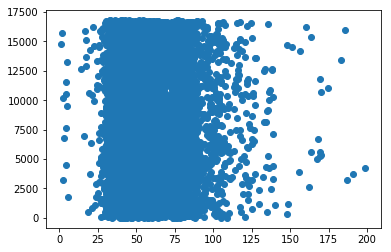

Разброс параметра LifeSquare


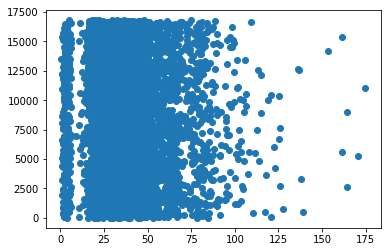

Разброс параметра KitchenSquare


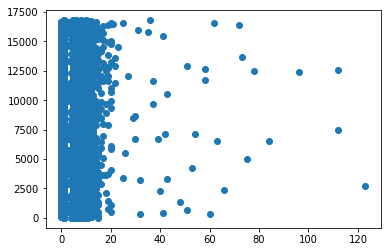

Разброс параметра HouseFloor


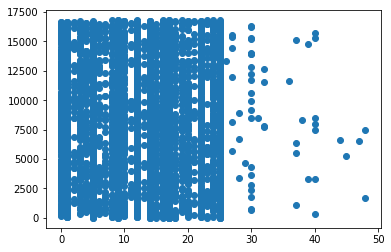

In [227]:
print_scatter(db_tmp, col2)

#### 4. Убираем пропуски в данных

In [275]:

print("Медиана\n",db_tmp.median())
db_tmp.info()

Медиана
 Id                 8394.500000
DistrictId           36.000000
Rooms                 2.000000
Square               52.513310
LifeSquare           32.781260
KitchenSquare         6.000000
Floor                 7.000000
HouseFloor           13.000000
HouseYear          1977.000000
Ecology_1             0.075424
Ecology_2             1.000000
Ecology_3             1.000000
Social_1             25.000000
Social_2           5285.000000
Social_3              2.000000
Healthcare_1        900.000000
Helthcare_2           1.000000
Shops_1               3.000000
Shops_2               1.000000
Price            192269.644879
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor        

In [253]:
print(db_tmp.loc[(db_tmp["HouseFloor"].isnull())])
db_tmp.loc[(db_tmp["Id"] == 10806), "HouseFloor" ] = 5
db_tmp.loc[(db_tmp["Id"] == 9300), "HouseFloor" ] = 17
db_tmp.loc[(db_tmp["Id"] == 78), "HouseFloor" ] = 17

        Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8599  9300          74    2.0  71.747869   74.579809            9.0      5   
8854    78          30    2.0  65.773749   66.811789            1.0      8   

      HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  \
8599         NaN       1977   0.075779          1          1         6   
8854         NaN       1977   0.000078          1          1        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  \
8599      1437         3           NaN            0        2        1   
8854      6398       141        1046.0            3       23        1   

              Price  
8599  243329.912579  
8854  207248.370520  
Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price]
Index: []


In [259]:
db_2 = db_tmp.copy()

In [272]:
a = db_2.loc[(db_2["LifeSquare"].notnull()), "Square"] / db_2.loc[(db_2["LifeSquare"].notnull()), "LifeSquare"] 
print(a.mean(), np.round(a).mode())

2.126463500215756 0    2.0
dtype: float64


In [273]:
db_2.loc[(db_2['LifeSquare'].isnull()), 'LifeSquare'] = db_2['Square']/a.mean()

In [276]:
print("Медиана\n",db_2.median())
db_2.info()

Медиана
 Id                 8394.500000
DistrictId           36.000000
Rooms                 2.000000
Square               52.513310
LifeSquare           31.293528
KitchenSquare         6.000000
Floor                 7.000000
HouseFloor           13.000000
HouseYear          1977.000000
Ecology_1             0.075424
Ecology_2             1.000000
Ecology_3             1.000000
Social_1             25.000000
Social_2           5285.000000
Social_3              2.000000
Healthcare_1        900.000000
Helthcare_2           1.000000
Shops_1               3.000000
Shops_2               1.000000
Price            192269.644879
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor       

In [293]:
db_3 = db_2.copy()
db_3 = db_3.drop("Healthcare_1", axis=1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,1,1,33,7976,5,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,1,1,46,10309,1,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,1,1,34,7759,0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,1,1,23,5735,3,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,1,1,35,5776,1,2,4,1,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,1,1,35,7715,4,0,6,1,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,1,1,20,4386,14,1,5,1,296021.204377
7,11993,74,2.0,80.312926,37.768307,0.0,14,0.0,1977,7.577876e-02,1,1,6,1437,3,0,2,1,221244.156664
8,5172,1,2.0,64.511437,30.337430,1.0,9,17.0,1977,7.122317e-03,1,1,1,264,0,0,1,1,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,1,1,6,1437,3,0,2,1,95380.220993


#### Выявляем кореллирующие признаки

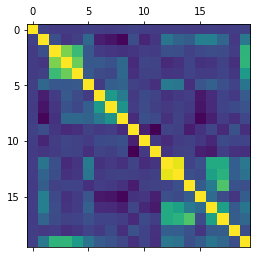

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,1,0.0129728,-0.00746988,-0.00679193,-0.00417986,0.0106468,0.00134772,-0.00697149,0.00363382,0.0180973,0.00309897,-0.00540799,-0.000771554,-0.00203318,-0.00935794,-0.00387873,0.00150182,-0.00871771,0.00364463,0.00988026
DistrictId,0.0129728,1,0.0763866,-0.0278189,0.0067195,0.185863,-0.120373,-0.151889,-0.2005,0.065294,-0.0934062,-0.0279019,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,-0.0210178,0.2651
Rooms,-0.00746988,0.0763866,1,0.759879,0.612855,0.111113,-0.00541777,-0.030921,-0.0443334,-0.0312139,-0.0024861,-0.00686902,0.0773567,0.0722483,0.0146234,0.045273,0.0640649,0.0542424,-0.00151602,0.570698
Square,-0.00679193,-0.0278189,0.759879,1,0.727059,0.11221,0.119384,0.0872837,0.190064,-0.0718656,0.0323758,0.0292786,-0.0789527,-0.0493657,0.0246979,-0.0462986,-0.0321239,0.0121159,-0.0576137,0.57897
LifeSquare,-0.00417986,0.0067195,0.612855,0.727059,1,0.119215,0.0582438,0.0428828,0.182943,-0.0527094,0.0186924,0.0175892,-0.036611,-0.0236643,0.0219406,-0.00988075,-0.0051424,0.0219555,-0.0266569,0.444689
KitchenSquare,0.0106468,0.185863,0.111113,0.11221,0.119215,1,-0.011191,0.141567,0.167577,0.0200621,-0.00610137,-0.0565923,0.278082,0.254966,-0.0593508,0.0982314,0.15379,0.0765456,0.0222296,0.247746
Floor,0.00134772,-0.120373,-0.00541777,0.119384,0.0582438,-0.011191,1,0.432927,0.284264,-0.016133,0.0496614,0.0257672,-0.0449136,-0.0165596,-0.00223667,-0.138294,-0.0655365,0.0242643,-0.013626,0.128715
HouseFloor,-0.00697149,-0.151889,-0.030921,0.0872837,0.0428828,0.141567,0.432927,1,0.40612,-0.00290617,0.060669,0.00882402,-0.019142,0.0089087,-0.0163453,-0.154153,-0.0739112,0.0214653,0.0512375,0.0893238
HouseYear,0.00363382,-0.2005,-0.0443334,0.190064,0.182943,0.167577,0.284264,0.40612,1,-0.0660872,0.0768287,0.0472062,-0.0478938,0.0136289,-0.0493026,-0.20475,-0.115746,-0.00194899,-0.058743,0.0367043
Ecology_1,0.0180973,0.065294,-0.0312139,-0.0718656,-0.0527094,0.0200621,-0.016133,-0.00290617,-0.0660872,1,-0.110725,-0.223197,0.0264641,0.00926363,-0.124068,-0.0435472,0.0308729,-0.0767492,0.0798085,-0.0583807


In [278]:
X_corr = db_2.corr()
plt.matshow(X_corr)
plt.show()
X_corr.style.background_gradient(cmap='coolwarm')

#### Обучаем отобранную ранее модель

In [405]:
train, valid = train_test_split(db_2, test_size=0.3, random_state=42)
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']

In [310]:
from sklearn.metrics import r2_score as r2
r2(train['Price'], y_pred_train)

0.5354570461799615

In [311]:
y_pred_valid = model.predict(valid.loc[:, feats])

In [312]:
r2(valid['Price'], y_pred_valid)

0.5175836762585624

In [407]:
train, valid = train_test_split(db_2, test_size=0.3, random_state=42)
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Shops_2']

In [315]:
def evaluate_model(model, train, valid, metric, feats, target, max_depth):
    dtr = model(max_depth=max_depth)
    dtr.fit(train.loc[:, feats], train[target])
    y_pred_train = dtr.predict(train.loc[:, feats])
    y_pred_valid = dtr.predict(valid.loc[:, feats])
    metric_train = metric(train[target], y_pred_train)
    metric_valid = metric(valid[target], y_pred_valid)
    #print('MaxDepth: {}\nTrain: {}, \nValid: {}\n'.format(max_depth, metric_train, metric_valid))
    return metric_train, metric_valid

In [323]:
from sklearn.tree import DecisionTreeRegressor as DTR
evaluate_model(model=DTR, train=train, valid=valid, metric=r2, feats=feats, target='Price', 
               max_depth=7)

(0.7164075634768439, 0.6215902035312737)

In [408]:
evaluate_model(model=RFR, train=train, valid=valid, metric=r2, feats=feats, target='Price', 
               max_depth=12)

(0.8867381877697615, 0.6955904080315349)

In [327]:
evaluate_model(model=RFR, train=train, valid=valid, metric=r2, feats=feats, target='Price', 
               max_depth=10)

(0.8461440470442787, 0.6801599010539554)

In [324]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [320]:
def check_param(min_value, max_value, model, train=train, valid=valid, metric=r2, feats=feats, 
                             target='Price'):
    max_depth_arr = []
    metric_train_arr = []
    metric_valid_arr = []

    for i in range(min_value, max_value+1):
        res = evaluate_model(model, train, valid, metric, feats, 
                             target, max_depth=i)
        max_depth_arr.append(i)
        metric_train_arr.append(res[0])
        metric_valid_arr.append(res[1])
    return max_depth_arr, metric_train_arr, metric_valid_arr

In [336]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=14, model=RFR)

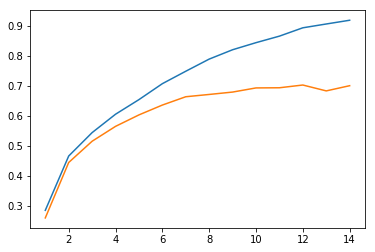

In [337]:
plt.plot(max_depth_arr, metric_train_arr)
plt.plot(max_depth_arr, metric_valid_arr)

In [334]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV

In [332]:
X = db_2.copy()
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)

y = db_2["Price"]

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100 )

In [71]:
parameters = {
    'n_estimators': [150, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
)

#### Готовим данные для прогноза

In [384]:
predictions = pd.read_csv("test.csv", sep=",")

In [385]:
predictions

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [390]:
b = [ 'Shops_2']
AB = ("A","B")
make_dummy(predictions, AB, b)




,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,NaN,0,0,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,NaN,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,1,1,34,7759,0,229.0,1,3,1
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,1,1,46,7960,6,350.0,3,11,1
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,1,1,53,14892,4,NaN,1,4,1
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,1,1,5,1564,0,540.0,0,0,1


In [392]:
predictions.loc[(predictions['LifeSquare'].isnull()), 'LifeSquare'] = predictions['Square']/a.mean()

In [393]:

predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int64
dtypes: float64(7), int64(12)
memory usage: 742.3 KB


In [354]:
predictions.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,0.0,0.0,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,0.0
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,NaN,NaN,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,NaN
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,NaN,NaN,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,NaN
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,NaN,NaN,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,NaN,NaN,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,NaN
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,NaN,NaN,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,NaN
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,NaN,NaN,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,NaN
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,NaN,NaN,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,NaN


#### Итоговая модель и экспорт в файл

In [409]:
model = RFR(max_depth=12)
model.fit(db_2.loc[:, feats], db_2["Price"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [410]:
answer = model.predict(predictions.loc[:, feats])

In [411]:
type(answer)

numpy.ndarray

In [412]:
result = pd.Series(answer, index=predictions["Id"])

In [413]:
result_df = pd.DataFrame(
    {'Price': answer},
    index=predictions["Id"],
)

In [414]:
result_df.to_csv("DDyachenko_predictions.csv", sep=",")